In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [3]:
!kaggle datasets download -d hernan4444/anime-recommendation-database-2020

 99% 657M/661M [00:05<00:00, 87.1MB/s]
100% 661M/661M [00:05<00:00, 127MB/s] 


In [4]:
INPUT_DIR = '/content/anime-recommendation-database-2020.zip'
!ls {INPUT_DIR}

/content/anime-recommendation-database-2020.zip


In [5]:
input= !unzip anime-recommendation-database-2020.zip

In [2]:
import numpy as np
import pandas as pd

rating_df = pd.read_csv('animelist.csv', 
                        low_memory=True, 
                        usecols=["user_id", "anime_id", "rating"]
                        #, nrows=90000000
                        )
rating_df.head(4)

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,4898,0


In [3]:
# User should rate atleast 400 animies
n_ratings = rating_df['user_id'].value_counts()
rating_df = rating_df[rating_df['user_id'].isin(n_ratings[n_ratings >= 400].index)].copy()
len(rating_df)

71418114

In [4]:
# Scaling BTW (0 , 1.0)
min_rating = min(rating_df['rating'])
max_rating = max(rating_df['rating'])
rating_df['rating'] = rating_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float64)

AvgRating = np.mean(rating_df['rating'])
print('Avg', AvgRating)



Avg 0.4047793589172634


In [5]:
# Removing Duplicated Rows
duplicates = rating_df.duplicated()

if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rating_df = rating_df[~duplicates]

print('> {} duplicates'.format(rating_df.duplicated().sum()))

> 1 duplicates
> 0 duplicates


In [6]:
g = rating_df.groupby('user_id')['rating'].count()
top_users = g.dropna().sort_values(ascending=False)[:20]
top_r = rating_df.join(top_users, rsuffix='_r', how='inner', on='user_id')

g = rating_df.groupby('anime_id')['rating'].count()
top_animes = g.dropna().sort_values(ascending=False)[:20]
top_r = top_r.join(top_animes, rsuffix='_r', how='inner', on='anime_id')

pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc=np.sum)



anime_id,226,1535,1575,2001,2167,4224,5081,5114,6547,6746,9253,9989,10620,11757,15809,16498,19815,20507,22319,30276
user_id,,,,,,,,,,,,,,,,,,,,
20807,1.0,1.0,1.0,1.0,0.8,1.0,0.9,1.0,1.0,1.0,1.0,0.9,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.0
50485,0.0,0.6,1.0,1.0,0.9,1.0,1.0,1.0,1.0,0.9,1.0,0.9,0.6,1.0,1.0,0.9,1.0,1.0,1.0,0.8
63900,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.8,0.0,0.8,0.8,0.8
68042,0.8,1.0,0.9,1.0,0.7,0.9,1.0,0.9,0.7,0.8,0.9,0.8,0.4,0.4,0.6,0.9,0.3,0.2,0.5,0.9
85472,0.7,0.0,0.0,1.0,0.9,0.9,0.0,0.0,1.0,0.0,0.8,0.0,0.8,0.9,0.8,0.8,0.7,0.7,0.7,0.9
92529,0.9,0.9,1.0,1.0,0.0,0.8,0.0,0.9,0.9,0.0,1.0,0.0,0.8,0.9,0.8,0.9,0.9,0.8,0.8,1.0
122341,0.2,0.3,0.2,0.7,0.4,0.3,0.3,0.8,0.5,0.6,0.7,0.3,0.2,0.1,0.3,0.1,0.4,0.4,0.2,0.6
131988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140590,0.3,0.6,0.5,0.8,0.6,0.8,0.8,0.9,0.5,0.8,0.9,0.7,0.3,0.4,0.6,0.5,0.7,0.7,0.5,0.7


Data Preprocessing

In [7]:

# Encoding categorical data
user_ids = rating_df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
rating_df["user"] = rating_df["user_id"].map(user2user_encoded)
n_users = len(user2user_encoded)

anime_ids = rating_df["anime_id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}
rating_df["anime"] = rating_df["anime_id"].map(anime2anime_encoded)
n_animes = len(anime2anime_encoded)

print("Num of users: {}, Num of animes: {}".format(n_users, n_animes))
print("Min rating: {}, Max rating: {}".format(min(rating_df['rating']), max(rating_df['rating'])))



Num of users: 91641, Num of animes: 17560
Min rating: 0.0, Max rating: 1.0


In [8]:
rating_df = rating_df.sample(frac=1, random_state=73)

X = rating_df[['user', 'anime']].values
y = rating_df["rating"]

In [9]:

# Split
test_set_size = 10000 #10k for test set
train_indices = rating_df.shape[0] - test_set_size 

X_train, X_test, y_train, y_test = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print('> Train set ratings: {}'.format(len(y_train)))
print('> Test set ratings: {}'.format(len(y_test)))



> Train set ratings: 71408113
> Test set ratings: 10000


In [10]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [11]:
import tensorflow as tf

TPU_INIT = True

if TPU_INIT:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    !nvidia-smi
    
print(tf.__version__)

2.8.2


Modeeling

In [12]:
import keras
from keras import layers 
from keras.models import Model
from tensorflow.keras.optimizers import Adam



In [13]:
# Embedding layers
from keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten

def RecommenderNet():
    embedding_size = 128
    
    user = Input(name = 'user', shape = [1])
    user_embedding = Embedding(name = 'user_embedding',
                       input_dim = n_users, 
                       output_dim = embedding_size)(user)
    
    anime = Input(name = 'anime', shape = [1])
    anime_embedding = Embedding(name = 'anime_embedding',
                       input_dim = n_animes, 
                       output_dim = embedding_size)(anime)
    
    #x = Concatenate()([user_embedding, anime_embedding])
    x = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, anime_embedding])
    x = Flatten()(x)
        
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x)
    
    model = Model(inputs=[user, anime], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=["mae", "mse"], optimizer='Adam')
    
    return model

if TPU_INIT:    
    with tpu_strategy.scope():
        model = RecommenderNet()
else:
    model = RecommenderNet()

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 anime (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 128)       11730048    ['user[0][0]']                   
                                                                                                  
 anime_embedding (Embedding)    (None, 1, 128)       2247680     ['anime[0][0]']                  
                                                                                              

In [14]:
# Callbacks
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000

if TPU_INIT:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

checkpoint_filepath = './weights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True)

early_stopping = EarlyStopping(patience = 3, monitor='val_loss', 
                               mode='min', restore_best_weights=True)

my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping,   
]

In [15]:
# Model training
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

model.load_weights(checkpoint_filepath)

Epoch 1/20
893/893 [==============================] - 44s 36ms/step - loss: 0.7843 - mae: 0.3815 - mse: 0.1938 - val_loss: 0.7775 - val_mae: 0.3815 - val_mse: 0.1930 - lr: 1.0000e-05
Epoch 2/20
893/893 [==============================] - 26s 29ms/step - loss: 0.7574 - mae: 0.3718 - mse: 0.1830 - val_loss: 0.7020 - val_mae: 0.3473 - val_mse: 0.1608 - lr: 8.8000e-05
Epoch 3/20
893/893 [==============================] - 26s 29ms/step - loss: 0.5998 - mae: 0.2859 - mse: 0.1143 - val_loss: 0.5722 - val_mae: 0.2702 - val_mse: 0.1040 - lr: 1.6600e-04
Epoch 4/20
893/893 [==============================] - 26s 29ms/step - loss: 0.5468 - mae: 0.2518 - mse: 0.0916 - val_loss: 0.5378 - val_mae: 0.2473 - val_mse: 0.0896 - lr: 2.4400e-04
Epoch 5/20
893/893 [==============================] - 26s 29ms/step - loss: 0.5165 - mae: 0.2287 - mse: 0.0799 - val_loss: 0.5119 - val_mae: 0.2258 - val_mse: 0.0800 - lr: 3.2200e-04
Epoch 6/20
893/893 [==============================] - 26s 29ms/step - loss: 0.4924 - 

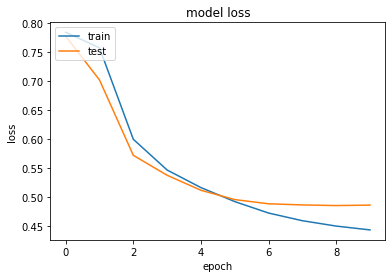

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

Extract weight from model

In [17]:

def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = extract_weights('anime_embedding', model)
user_weights = extract_weights('user_embedding', model)



In [18]:
df = pd.read_csv('anime.csv', low_memory=True)
df = df.replace("Unknown", np.nan)

In [19]:
df.head(10)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",NaN,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",NaN,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,...,9226.0,14904.0,22811.0,16734.0,6206.0,2621.0,795.0,336.0,140.0,151.0
6,16,Hachimitsu to Clover,8.06,"Comedy, Drama, Josei, Romance, Slice of Life",Honey and Clover,ハチミツとクローバー,TV,24,"Apr 15, 2005 to Sep 27, 2005",Spring 2005,...,11829.0,16309.0,20008.0,13062.0,5574.0,3148.0,1339.0,484.0,278.0,321.0
7,17,Hungry Heart: Wild Striker,7.59,"Slice of Life, Comedy, Sports, Shounen",NaN,ハングリーハート Wild Striker,TV,52,"Sep 11, 2002 to Sep 10, 2003",Fall 2002,...,1123.0,1777.0,3102.0,3075.0,1286.0,602.0,218.0,88.0,31.0,32.0
8,18,Initial D Fourth Stage,8.15,"Action, Cars, Sports, Drama, Seinen",NaN,頭文字〈イニシャル〉D FOURTH STAGE,TV,24,"Apr 17, 2004 to Feb 18, 2006",Spring 2004,...,10948.0,15820.0,22379.0,12912.0,3874.0,1236.0,369.0,97.0,48.0,259.0
9,19,Monster,8.76,"Drama, Horror, Mystery, Police, Psychological,...",Monster,モンスター,TV,74,"Apr 7, 2004 to Sep 28, 2005",Spring 2004,...,77350.0,60652.0,43459.0,22045.0,8861.0,4381.0,2086.0,882.0,593.0,1177.0


In [21]:
# Fixing Names
def getAnimeName(anime_id):
    try:
        name = df[df.anime_id == anime_id].eng_version.values[0]
        if name is np.nan:
            name = df[df.anime_id == anime_id].Name.values[0]
    except:
        print('error')
    
    return name

df['anime_id'] = df['MAL_ID']
df["eng_version"] = df['English name']
df['eng_version'] = df.anime_id.apply(lambda x: getAnimeName(x))

df.sort_values(by=['Score'], 
               inplace=True,
               ascending=False, 
               kind='quicksort',
               na_position='last')

df = df[["anime_id", "eng_version", 
         "Score", "Genres", "Episodes", 
         "Type", "Premiered", "Members"]]

In [22]:
def getAnimeFrame(anime):
    if isinstance(anime, int):
        return df[df.anime_id == anime]
    if isinstance(anime, str):
        return df[df.eng_version == anime]



In [23]:
cols = ["MAL_ID", "Name", "Genres", "sypnopsis"]
sypnopsis_df = pd.read_csv('anime_with_synopsis.csv', usecols=cols)

def getSypnopsis(anime):
    if isinstance(anime, int):
        return sypnopsis_df[sypnopsis_df.MAL_ID == anime].sypnopsis.values[0]
    if isinstance(anime, str):
        return sypnopsis_df[sypnopsis_df.Name == anime].sypnopsis.values[0]



In [27]:
pd.set_option("max_colwidth", None)

def find_similar_animes(name, n=10, return_dist=False, neg=False):
    try:
        index = getAnimeFrame(name).anime_id.values[0]
        encoded_index = anime2anime_encoded.get(index)
        weights = anime_weights
        
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1            
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('animes closest to {}'.format(name))

        if return_dist:
            return dists, closest
        
        rindex = df

        SimilarityArr = []

        for close in closest:
            decoded_id = anime_encoded2anime.get(close)
            sypnopsis = getSypnopsis(decoded_id)
            anime_frame = getAnimeFrame(decoded_id)
            
            anime_name = anime_frame.eng_version.values[0]
            genre = anime_frame.Genres.values[0]
            similarity = dists[close]
            SimilarityArr.append({"anime_id": decoded_id, "name": anime_name,
                                  "similarity": similarity,"genre": genre,
                                  'sypnopsis': sypnopsis})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.anime_id != index].drop(['anime_id'], axis=1)

    except:
        print('{}!, Not Found in Anime list'.format(name))

In [38]:


find_similar_animes('Naruto', n=5, neg=False)



animes closest to Naruto


,name,similarity,genre,sypnopsis
4,Naruto:Shippuden,0.931369,"Action, Adventure, Comedy, Super Power, Martial Arts, Shounen","It has been two and a half years since Naruto Uzumaki left Konohagakure, the Hidden Leaf Village, for intense training following events which fueled his desire to be stronger. Now Akatsuki, the mysterious organization of elite rogue ninja, is closing in on their grand plan which may threaten the safety of the entire shinobi world. Although Naruto is older and sinister events loom on the horizon, he has changed little in personality—still rambunctious and childish—though he is now far more confident and possesses an even greater determination to protect his friends and home. Come whatever may, Naruto will carry on with the fight for what is important to him, even at the expense of his own body, in the continuation of the saga about the boy who wishes to become Hokage."
3,Bleach,0.793916,"Action, Adventure, Comedy, Super Power, Supernatural, Shounen","Ichigo Kurosaki is an ordinary high schooler—until his family is attacked by a Hollow, a corrupt spirit that seeks to devour human souls. It is then that he meets a Soul Reaper named Rukia Kuchiki, who gets injured while protecting Ichigo's family from the assailant. To save his family, Ichigo accepts Rukia's offer of taking her powers and becomes a Soul Reaper as a result. However, as Rukia is unable to regain her powers, Ichigo is given the daunting task of hunting down the Hollows that plague their town. However, he is not alone in his fight, as he is later joined by his friends—classmates Orihime Inoue, Yasutora Sado, and Uryuu Ishida—who each have their own unique abilities. As Ichigo and his comrades get used to their new duties and support each other on and off the battlefield, the young Soul Reaper soon learns that the Hollows are not the only real threat to the human world."
2,Death Note,0.750340,"Mystery, Police, Psychological, Supernatural, Thriller, Shounen","shinigami, as a god of death, can kill any person—provided they see their victim's face and write their victim's name in a notebook called a Death Note. One day, Ryuk, bored by the shinigami lifestyle and interested in seeing how a human would use a Death Note, drops one into the human realm. High school student and prodigy Light Yagami stumbles upon the Death Note and—since he deplores the state of the world—tests the deadly notebook by writing a criminal's name in it. When the criminal dies immediately following his experiment with the Death Note, Light is greatly surprised and quickly recognizes how devastating the power that has fallen into his hands could be. With this divine capability, Light decides to extinguish all criminals in order to build a new world where crime does not exist and people worship him as a god. Police, however, quickly discover that a serial killer is targeting criminals and, consequently, try to apprehend the culprit. To do this, the Japanese investigators count on the assistance of the best detective in the world: a young and eccentric man known only by the name of L."
1,Dragon Ball Z,0.718976,"Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power","Five years after winning the World Martial Arts tournament, Gokuu is now living a peaceful life with his wife and son. This changes, however, with the arrival of a mysterious enemy named Raditz who presents himself as Gokuu's long-lost brother. He reveals that Gokuu is a warrior from the once powerful but now virtually extinct Saiyan race, whose homeworld was completely annihilated. When he was sent to Earth as a baby, Gokuu's sole purpose was to conquer and destroy the planet; but after suffering amnesia from a head injury, his violent and savage nature changed, and instead was raised as a kind and well-mannered boy, now fighting to protect others. With his failed attempt at forcibly recruiting Gokuu as an ally, Raditz warns Gokuu's friends of a new threat that's rapidly approaching Earth—one that c

In [45]:

find_similar_animes('Clannad ~After Story~', n=5, neg=False)

animes closest to Clannad ~After Story~


,name,similarity,genre,sypnopsis
4,Clannad,0.961590,"Comedy, Drama, Romance, School, Slice of Life, Supernatural","Tomoya Okazaki is a delinquent who finds life dull and believes he'll never amount to anything. Along with his friend Youhei Sunohara, he skips school and plans to waste his high school days away. One day while walking to school, Tomoya passes a young girl muttering quietly to herself. Without warning she exclaims ""Anpan!"" (a popular Japanese food) which catches Tomoya's attention. He soon discovers the girl's name is Nagisa Furukawa and that she exclaims things she likes in order to motivate herself. Nagisa claims they are now friends, but Tomoya walks away passing the encounter off as nothing. However, Tomoya finds he is noticing Nagisa more and more around school. Eventually he concedes and befriends her. Tomoya learns Nagisa has been held back a year due to a severe illness and that her dream is to revive the school's drama club. Claiming he has nothing better to do, he decides to help her achieve this goal along with the help of four other girls. As Tomoya spends more time with the girls, he learns more about them and their problems. As he attempts to help each girl overcome her respective obstacle, he begins to realize life isn't as dull as he once thought."
3,"Clannad:Another World, Tomoyo Chapter",0.788480,"Drama, Romance, School, Slice of Life","Clannad: Mou Hitotsu no Sekai, Tomoyo-hen is set in an alternate reality where Tomoya Okazaki dates his junior, Tomoyo Sakagami. Tomoyo has been elected to be the school's next Student Council President. This is great news as she can now work toward her goal of preventing the school's cherry blossom trees from being axed. Although Tomoya is ecstatic for her, given his reputation as a delinquent in school, his relationship with Tomoyo is making them the subject of gossip around the campus, which can potentially compromise her standing as Student Council President. The school community's disapproval of their relationship becomes more apparent when the Student Council's Vice-President and even the school's administration warn Tomoya to distance himself from Tomoyo. With the bad atmosphere widening the rift between Tomoya and Tomoyo, will Tomoya succumb to societal pressure and do as they say, or will their love for each other rise above it all?"
2,"Clannad ~After Story~:Another World, Kyou Chapter",0.786114,"Drama, Romance, School","Included in the 8th and final DVD of Clannad ~After Story~ is an extra episode set in an alternate universe. Here, Fujibayashi Kyou is the main heroine in place of Furukawa Nagisa. Love can be wonderfully exciting, but also extremely painful. Fujibayashi Ryou, Kyou's sister, is in love with Okazaki Tomoya, the male protagonist. With the help of Kyou, Ryou manages to sum up the courage to ask him out and now Tomoya and Ryou are a couple. However, as things progress, Kyou begins to acknowledge her feelings for Tomoya, and a love-triangle is formed. As everything is revealed, the sisters learn the pains of love and try to decide between the two loves of their life: Tomoya, or each other."
1,Clannad The Motion Picture,0.680660,"Drama, Romance, Fantasy, School","Tomoya Okazaki is a cynical delinquent who lacks ambition as he apathetically labors through high school. During his childhood, a tragedy had caused his father to seek solace in alcoholism and neglect his son. Yet, meaningful human interaction can be a benediction, as Tomoya learns when he meets the enigmatic Nagisa Furukawa. The odd girl offers a gesture of friendship to Tomoya, but he rejects the request, dismissing it as a trivial incident. However, as he soon realizes that he is encountering Nagisa more and more often during school, Tomoya drops his discompassions and befriends the girl. When he learns that Nagisa's dream is to revive the Drama Club, Tomoya decides to shed his detachment from the ordinary pleasures of life and dedicate himself to helping his new friend achieve he

In [40]:
print('> picking up random user')

ratings_per_user = rating_df.groupby('user_id').size()
random_user = ratings_per_user[ratings_per_user < 500].sample(1, random_state=None).index[0]
print('> user_id:', random_user)

> picking up random user
> user_id: 84760


In [41]:
pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_users(item_input, n=10,return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user2user_encoded.get(index)
        weights = user_weights
    
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('> users similar to #{}'.format(item_input))

        if return_dist:
            return dists, closest
        
        rindex = df
        SimilarityArr = []
        
        for close in closest:
            similarity = dists[close]

            if isinstance(item_input, int):
                decoded_id = user_encoded2user.get(close)
                SimilarityArr.append({"similar_users": decoded_id, 
                                      "similarity": similarity})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", 
                                                        ascending=False)
        
        return Frame
    
    except:
        print('{}!, Not Found in User list'.format(name))

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:630: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:630: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [42]:


similar_users = find_similar_users(int(random_user), 
                                   n=5, 
                                   neg=False)

similar_users = similar_users[similar_users.similarity > 0.4]
similar_users = similar_users[similar_users.similar_users != random_user]
similar_users.head(5)



> users similar to #84760


,similar_users,similarity
4,50706,0.611921
3,217185,0.585195
2,83446,0.547777
1,346665,0.545577
0,120551,0.543483


In [43]:
from wordcloud import WordCloud
from collections import defaultdict
import matplotlib.pyplot as plt

def showWordCloud(all_genres):
    genres_cloud = WordCloud(width=700, height=400, 
                             background_color='white', 
                             colormap='gnuplot').generate_from_frequencies(all_genres)
    
    plt.figure(figsize=(10,8)) 
    plt.imshow(genres_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def getFavGenre(frame, plot=False):
        frame.dropna(inplace=False)
        all_genres = defaultdict(int)
        
        genres_list = []
        for genres in frame['Genres']:
            if isinstance(genres, str):
                for genre in genres.split(','):
                    genres_list.append(genre)
                    all_genres[genre.strip()] += 1    
        if plot:
            showWordCloud(all_genres)
        
        return genres_list

    
def get_user_preferences(user_id, plot=False, verbose=0):
    animes_watched_by_user = rating_df[rating_df.user_id==user_id]
    user_rating_percentile = np.percentile(animes_watched_by_user.rating, 75)
    animes_watched_by_user = animes_watched_by_user[animes_watched_by_user.rating >= user_rating_percentile]
    top_animes_user = (
        animes_watched_by_user.sort_values(by="rating", ascending=False)#.head(10)
        .anime_id.values
    )
    
    anime_df_rows = df[df["anime_id"].isin(top_animes_user)]
    anime_df_rows = anime_df_rows[["eng_version", "Genres"]]
    
    if verbose != 0:
        print("> User #{} has rated {} movies (avg. rating = {:.1f})".format(
          user_id, len(animes_watched_by_user),
          animes_watched_by_user['rating'].mean(),
        ))
    
        print('> preferred genres')
    
    if plot:
        getFavGenre(anime_df_rows, plot)
        
    return anime_df_rows#.eng_version.values

> User #84760 has rated 214 movies (avg. rating = 0.9)
> preferred genres


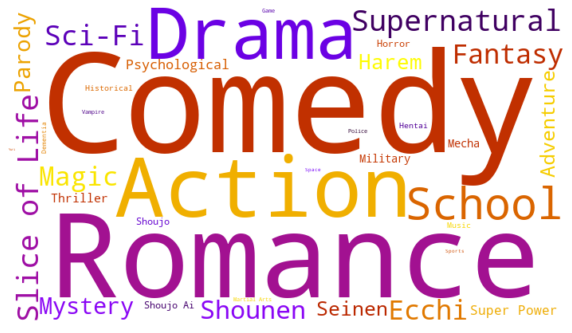

> animes highly rated by this user


,eng_version,Genres
3537,Clannad ~After Story~,"Slice of Life, Comedy, Supernatural, Drama, Romance"
2656,Code Geass:Lelouch of the Rebellion R2,"Action, Military, Sci-Fi, Super Power, Drama, Mecha"
0,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1431,Code Geass:Lelouch of the Rebellion,"Action, Military, Sci-Fi, Super Power, Drama, Mecha, School"
142,Princess Mononoke,"Action, Adventure, Fantasy"


In [44]:
user_pref = get_user_preferences(random_user, plot=True, verbose=1)
print('> animes highly rated by this user')

pd.DataFrame(user_pref).head(5)

In [48]:
def get_recommended_animes(similar_users, n=10):
    recommended_animes = []
    anime_list = []
    
    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id), verbose=0)
        pref_list = pref_list[~ pref_list.eng_version.isin(user_pref.eng_version.values)]
        anime_list.append(pref_list.eng_version.values)
        
    anime_list = pd.DataFrame(anime_list)
    sorted_list = pd.DataFrame(pd.Series(anime_list.values.ravel()).value_counts()).head(n)
    
    for i, anime_name in enumerate(sorted_list.index):        
        n_user_pref = sorted_list[sorted_list.index == anime_name].values[0][0]
        if isinstance(anime_name, str):
            try:
                frame = getAnimeFrame(anime_name)
                anime_id = frame.anime_id.values[0]
                genre = frame.Genres.values[0]
                sypnopsis = getSypnopsis(int(anime_id))
                recommended_animes.append({#"anime_id": anime_id ,
                                            "n": n_user_pref,
                                            "anime_name": anime_name, 
                                            "Genres": genre, 
                                            "sypnopsis": sypnopsis})
            except:
                pass
    
    return pd.DataFrame(recommended_animes)

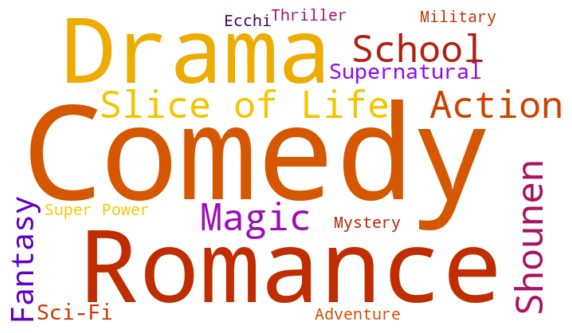


> Top recommendations for user: 84760


,n,anime_name,Genres,sypnopsis
0,6,Amagami SS,"Slice of Life, Comedy, Romance, School","Two years ago, Junichi Tachibana had a date on Christmas Eve but was stood up instead. Since then, he has had a hard time showing others his true feelings in fear of being rejected again. However, as luck would have it, Junichi may have a second chance at love when he meets several girls whom he becomes romantically interested in: Haruka Morishima, the energetic and popular upperclassman with a love for cute things; Kaoru Tanamachi, his childhood friend who harbors secret feelings for him; Sae Nakata, the timid transfer student who is shy around men; Ai Nanasaki, a girl on the swim team who has a bad first impression of Junichi; Rihoko Sakurai, a childhood friend with a love for sweets; and Tsukasa Ayatsuji, a seemingly perfect class representative who has a hidden dark side. As Christmas Eve approaches, Junichi can only hope that this will be the year he will finally spend the holidays with the one he truly loves."
1,5,Fullmetal Alchemist:Brotherhood,"Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen","""In order for something to be obtained, something of equal value must be lost."" Alchemy is bound by this Law of Equivalent Exchange—something the young brothers Edward and Alphonse Elric only realize after attempting human transmutation: the one forbidden act of alchemy. They pay a terrible price for their transgression—Edward loses his left leg, Alphonse his physical body. It is only by the desperate sacrifice of Edward's right arm that he is able to affix Alphonse's soul to a suit of armor. Devastated and alone, it is the hope that they would both eventually return to their original bodies that gives Edward the inspiration to obtain metal limbs called ""automail"" and become a state alchemist, the Fullmetal Alchemist. Three years of searching later, the brothers seek the Philosopher's Stone, a mythical relic that allows an alchemist to overcome the Law of Equivalent Exchange. Even with military allies Colonel Roy Mustang, Lieutenant Riza Hawkeye, and Lieutenant Colonel Maes Hughes on their side, the brothers find themselves caught up in a nationwide conspiracy that leads them not only to the true nature of the elusive Philosopher's Stone, but their country's murky history as well. In between finding a serial killer and racing against time, Edward and Alphonse must ask themselves if what they are doing will make them human again... or take away their humanity."
2,5,Nisemonogatari,"Mystery, Comedy, Supernatural, Ecchi","Surviving a vampire attack, meeting several girls plagued by supernatural entities, and just trying to get through life are some of the things high school student Koyomi Araragi has had to deal with lately. On top of all this, he wakes up one morning to find himself kidnapped and tied up by his girlfriend Hitagi Senjougahara. Having run afoul of Deishuu Kaiki, a swindler who conned Senjougahara's family, she has taken it upon herself to imprison Araragi to keep him safe from the con man. But when Araragi gets a frantic message from his sister Karen, he learns that the fraud has set his sights on her. Along with Karen's troubles, his other sister, Tsukihi, is having issues of her own. And when two mysterious women who seem to know more than they should about Araragi and his special group of friends step into their lives, not even he could anticipate their true goals, nor the catastrophic truths soon to be revealed."
3,5,Kaze no Stigma,"Action, Magic, Romance, Fantasy, Shounen","Kazuma Yagami is a user of ""Fuujutsu,"" the ability to control the wind. He returns to his old home, the noble Kannagi household, after being banished four years ago for his inability to control fire and his subsequent defeat in a duel at the hands of his younger cousin, Ayano Kannagi. Returning after such a brutal exile already gives rise to many conflicts, but to make matters worse, several Kannagi family members have recently bee

In [49]:
recommended_animes = get_recommended_animes(similar_users, n=10)
getFavGenre(recommended_animes, plot=True)

print('\n> Top recommendations for user: {}'.format(random_user))
recommended_animes

In [52]:
print("Showing recommendations for user: {}".format(random_user))
print("===" * 25)

animes_watched_by_user = rating_df[rating_df.user_id==random_user]
anime_not_watched_df = df[
    ~df["anime_id"].isin(animes_watched_by_user.anime_id.values)
]

anime_not_watched = list(
    set(anime_not_watched_df['anime_id']).intersection(set(anime2anime_encoded.keys()))
)

anime_not_watched = [[anime2anime_encoded.get(x)] for x in anime_not_watched]

user_encoder = user2user_encoded.get(random_user)

user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

user_anime_array = [user_anime_array[:, 0], user_anime_array[:, 1]]
ratings = model.predict(user_anime_array).flatten()

top_ratings_indices = (-ratings).argsort()[:10]

recommended_anime_ids = [
    anime_encoded2anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
]

Results = []
top_rated_ids = []

for index, anime_id in enumerate(anime_not_watched):
    rating = ratings[index]
    id_ = anime_encoded2anime.get(anime_id[0])
    
    if id_ in recommended_anime_ids:
        top_rated_ids.append(id_)
        try:
            condition = (df.anime_id == id_)
            name = df[condition]['eng_version'].values[0]
            genre = df[condition].Genres.values[0]
            score = df[condition].Score.values[0]
            sypnopsis = getSypnopsis(int(id_))
        except:
            continue
            
        Results.append({#"anime_id": id_, 
                        "name": name, 
                        "pred_rating": rating,
                        "genre": genre, 
                        'sypnopsis': sypnopsis})

print("---" * 25)
print("> Top 10 anime recommendations")
print("---" * 25)


Results = pd.DataFrame(Results).sort_values(by='pred_rating', ascending=False)
Results

Showing recommendations for user: 84760
---------------------------------------------------------------------------
> Top 10 anime recommendations
---------------------------------------------------------------------------


,name,pred_rating,genre,sypnopsis
6,Minami-ke Okaeri,0.930261,"Slice of Life, Comedy, School","ar has passed since Okawari and the three sisters have grown up. Their likings and moods are almost the same. Haruka, the older sister, is a love-giving mother to the younger sisters and a discipline follower. Kana, the middle one, leaves everything to the last possible moment and always gives trouble to the trio. Chiaki, the little one, is the calculating and manipulating one; she likes to be admired and loved by Haruka and always gives trouble to the less blessed Kana. Despite being an unbalanced family, they love each other with all their heart. The family's daily life is as funny as ever; trouble and love are always present. Now it's time to see if they'll survive this age change since Haruka is now a young adult; she has even more responsibilities, having to watch over the young while integrating into the adult life. (Source: ANN)"
4,Minami-ke Okawari,0.913365,"Comedy, School, Slice of Life","The second season of Minami-Ke. It picks up where the first season left off, and just like the first season, it's about the daily lives of the three Minami sisters, Haruka, Kana and Chiaki, and their school friends."
1,School Rumble 2nd Semester,0.911864,"Comedy, Romance, School, Shounen","Continuing right where season 1 left off: Harima still likes Tenma but still runs into obstacles everytime he tries to confess his love to her. To complicate the situation, Class 2-D challenges class 2-C once again and there's a rumor floating around that Harima and Yakumo are dating as the school prepares for the cultural festival. (Source: ANN)"
7,OreImo,0.908804,"Slice of Life, Comedy","Kirino Kousaka embodies the ideal student with equally entrancing looks. Her grades are near perfect, and to cover her personal expenses, she works as a professional model alongside her best friend Ayase Aragaki, who abhors liars and all things otaku. But what Ayase doesn't know is that Kirino harbors a deep, entrenched secret that will soon be brought to light. At home one day, Kyousuke, Kirino's perfectly average brother, stumbles upon an erotic game that belongs to none other than his seemingly flawless little sister. With her reputation at stake, Kirino places a gag order on her sibling while simultaneously introducing him to the world of eroge and anime. Through Kirino, Kyousuke encounters the gothic lolita Ruri Gokou and the bespectacled otaku Saori Makishima, thus jump-starting an entirely new lifestyle. But as he becomes more and more involved in his little sister's secret life, it becomes that much harder to keep under wraps."
8,A Certain Magical Index II,0.901649,"Action, Magic, Sci-Fi, Super Power","s tensions between the world of magic and Academy City continues to rise, Touma Kamijou and his hand of negation must face off against both esper and magician in order to protect the lives of those around him. Of course, he is not alone in his fight; whether by his side or out of sight, allies and enemies both old and new will enter the fray to help him. Toaru Majutsu no Index II continues the story of action and comedy, as the scale of Touma and his allies' battle grows ever larger. A conflict is slowly brewing on the horizon, and magic and science will cross paths once again in the war to come."
5,Evangelion:2.0 You Can (Not) Advance,0.899900,"Action, Sci-Fi, Psychological, Drama, Mecha","hen the threat of the Angel menace escalates, mankind's defense force is pushed to its limits, with Nerv at the forefront of the struggle. Shinji Ikari and his partner Rei Ayanami are assisted by two new pilots: the fiery Asuka Langley Shikinami and the mysterious Mari Illustrious Makinami. With the aid of their mechanized Evangelion units, equipped with weapons perfect for engaging their monstrous opponents, the four young souls fight desperately to protect their loved ones and prevent an impending apocalypse. But when startling secrets are brought to light, will the heroes' g

In [53]:
model.save('anime_model.h5')

from IPython.display import FileLink
FileLink(r'./anime_model.h5')

/content/anime_model.h5